<a href="https://colab.research.google.com/github/sabihaf/PythonProjects/blob/main/Completed_Unit3_Python_Advanced_Pandas_DataWrangling_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.offline 
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df["salary"].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df["salary"].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
df_new = df[["sex","salary"]]
df_new.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [ ]:
df_new.tail()

,sex,salary
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329
396,Male,81035


Finding the Median salary for all males

In [ ]:
df
df_male = df[df['sex'] == 'Male']
df_male["salary"].median()

108043.0

Finding the Median salary for all females

In [ ]:
df_female = df_new[df_new["sex"] == "Female"]
df_female["salary"].median()

103750.0

Comparing the Mean salary of Males and Females

In [ ]:
#Mean salary of males
male = df_male["salary"].mean()
print(male)

115090.41899441341


In [ ]:
#Mean salary of females
female = df_female["salary"].mean()
print(female)

101002.41025641025


In [ ]:
# The difference between mean salaries of male and female
male - female

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
df_exp = df[["yrs.service", "salary"]]
exp_20_plus = df_exp["yrs.service"] >= 20
exp_20_plus

0      False
1      False
2      False
3       True
4       True
       ...  
392     True
393    False
394     True
395    False
396    False
Name: yrs.service, Length: 397, dtype: bool

In [ ]:
exp_mean = df_exp[exp_20_plus]
exp_mean

,yrs.service,salary
3,39,115000
4,41,141500
6,23,175000
7,45,147765
8,20,119250
...,...,...
384,21,125192
386,27,139219
388,36,119450
392,30,103106


In [ ]:
exp_mean["salary"].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
exp_20_less = df_exp["yrs.service"] < 20

In [ ]:
exp_20_less_mean = df_exp[exp_20_less]
exp_20_less_mean

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
5,6,97000
9,18,129000
...,...,...
390,19,166605
391,19,151292
393,19,150564
395,15,95329


In [ ]:
exp_20_less_mean["salary"].mean()

107940.50416666667

In [ ]:
#Difference between 20+ yrs of exp vs. less than 20 years of exp. 
exp_mean["salary"].mean() - exp_20_less_mean["salary"].mean()

14580.151884288745

People who have salary of greater than or equal to 200,000

In [ ]:
greater_salary = df_exp["salary"] >= 200000
df_exp[greater_salary]

,yrs.service,salary
43,38,231545
249,7,204000
364,43,205500


Your Findings here...


# Rename values, subset columns, etc

In [ ]:
drop_cols = ["Unnamed: 0", "discipline", "yrs.since.phd"]
df.drop(drop_cols, inplace=True, axis=1)
df

,rank,yrs.service,sex,salary
0,Prof,18,Male,139750
1,Prof,16,Male,173200
2,AsstProf,3,Male,79750
3,Prof,39,Male,115000
4,Prof,41,Male,141500
...,...,...,...,...
392,Prof,30,Male,103106
393,Prof,19,Male,150564
394,Prof,25,Male,101738
395,Prof,15,Male,95329


# Create some simple visualizations showing some simple statistics

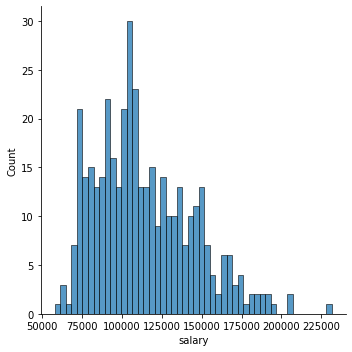

In [ ]:
sns.displot(df["salary"], bins=50)

Your observations from the visuals: 
Majority of people earn a salary between 100000-125000 dollars.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

On average men have a higher salary compared to females.I also found that year of service does not necessarily mean a higher salary. 